In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# برای ذخیره نتایج تحلیل هر گراف
graphs_info = []

In [21]:
# تعریف سه مجموعه پارامتر مختلف برای ساخت گراف
params = [
    (100, 0.10),   # گراف 1: 100 گره و احتمال 0.10
    (100, 0.07),   # گراف 2: 100 گره و احتمال 0.08
    (100, 0.06),   # گراف 3: 100 گره و احتمال 0.06
]

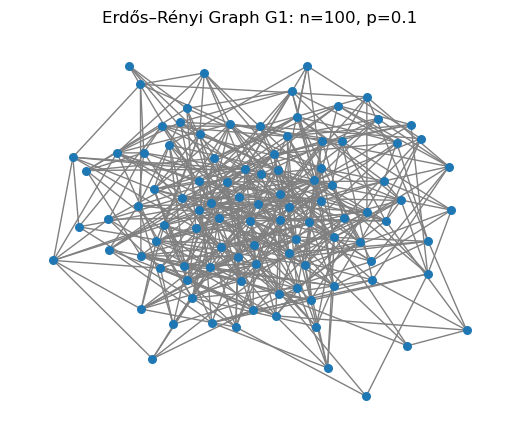

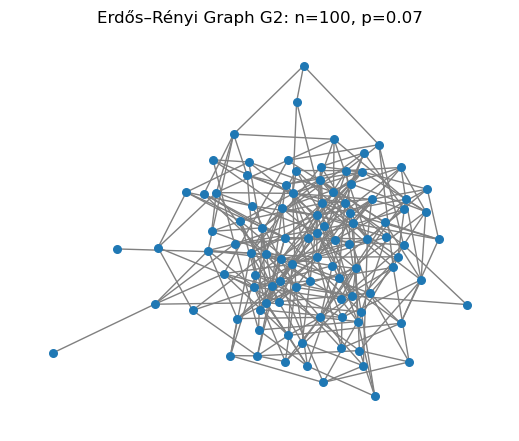

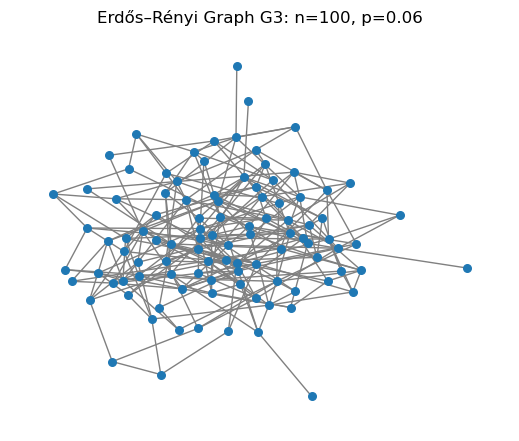

In [22]:
# حلقه ساخت و تحلیل گراف‌ها
for i, (n, p) in enumerate(params):
    G = nx.erdos_renyi_graph(n=n, p=p, seed=42)

    # محاسبه پارامترها
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / N
    clustering = nx.average_clustering(G)
    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    else:
        avg_path = diameter = "Disconnected"

    # ذخیره نتایج برای گزارش
    graphs_info.append({
        'Graph': f"G{i+1}",
        'Nodes (N)': N,
        'Edges (L)': L,
        'Avg Degree <k>': round(avg_degree, 2),
        'Clustering Coeff': round(clustering, 4),
        'Avg Path Length': avg_path,
        'Diameter': diameter,
    })

    # رسم گراف
    plt.figure(figsize=(5, 4))
    nx.draw_spring(G, node_size=30, edge_color='gray')
    plt.title(f"Erdős–Rényi Graph G{i+1}: n={n}, p={p}")
    plt.show()

In [23]:
import pandas as pd
df = pd.DataFrame(graphs_info)
df

,Graph,Nodes (N),Edges (L),Avg Degree <k>,Clustering Coeff,Avg Path Length,Diameter
0,G1,100,474,9.48,0.0878,2.270303,4
1,G2,100,319,6.38,0.0577,2.656364,5
2,G3,100,269,5.38,0.0537,2.876768,6
